In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import cm
from matplotlib.pyplot import plot,savefig
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import os
import numpy as np

([<matplotlib.patches.Wedge at 0x1fab757cb50>,
 [Text(-1.099925433724177, 0.012807819747373045, 'Unknown smORFs'),
  Text(1.2499152679803214, -0.014554135827368109, 'Homologs')],
 [Text(-0.5999593274859147, 0.006986083498567114, '91.30%'),
  Text(0.7499491607881927, -0.008732481496420865, '8.70%')])

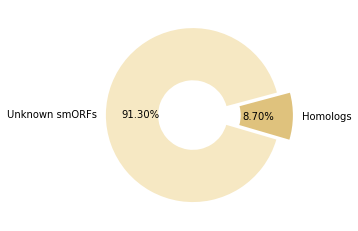

In [2]:
# high quality
total_smorfs = 43617914
data = [total_smorfs - 3796490,3796490]
classes = ['Unknown smORFs', 'Homologs']
explode = [0, 0.15]
plt.pie(data,
        labels=classes,
        colors=['#f6e8c3','#dfc27d'],
        explode=explode,
        autopct='%.2f%%',
        startangle = 15,
        wedgeprops={'width': 0.6})

Text(0, 0.5, 'Proportion of homologs (%)')

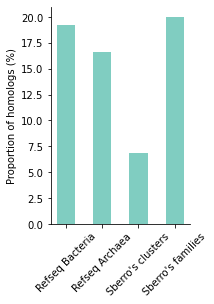

In [4]:
fig, ax = plt.subplots(figsize=(2.5,4))
x = ['Refseq Bacteria', 'Refseq Archaea', "Sberro's clusters", "Sberro's families"]
y = [19.24,16.57,6.85,20]
plt.bar(x,y,color='#80cdc1',width=0.5,label='Homolog')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.ylabel('Proportion of homologs (%)')

In [6]:
df = pd.read_csv('./data/supp_figure5/homolog.csv')
df['Non_isolate'] = df['All']-df['Isolate']
df

,Homolog,Human,Non_human,Isolate,All,Non_isolate
0,Homolog to sberro's clusters,85.01,14.43,0.56,100,99.44
1,Non-homolog to sberro's clusters,13.17,86.61,0.22,100,99.78
2,Homolog to sberro's families,89.53,9.85,0.62,100,99.38
3,Non-homolog to sberro's families,13.41,86.37,0.22,100,99.78
4,All 100AA smORFs,13.41,86.37,0.22,100,99.78


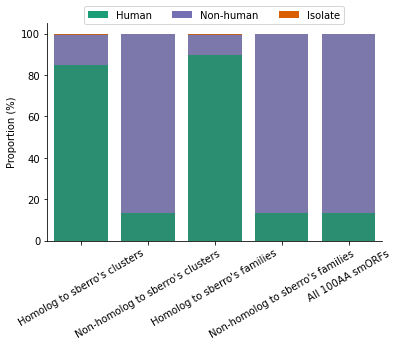

In [7]:
fig, ax = plt.subplots()
sns.barplot(x = df.Homolog, y = df.All, color = '#d95f02')
medium_plot = sns.barplot(x = df.Homolog, y = df.Non_isolate, color = '#7570b3')
bottom_plot = sns.barplot(x = df.Homolog, y = df.Human, color = '#1b9e77')

bottom_plot.set_xticklabels(df.Homolog, rotation=30)
bottom_plot.set_ylabel("Proportion (%)")
bottom_plot.set_xlabel("")
topbar = plt.Rectangle((0,0),1,1,fc="#1b9e77", edgecolor = 'none')
mediumbar = plt.Rectangle((0,0),1,1,fc="#7570b3", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#d95f02',  edgecolor = 'none')
plt.legend([topbar,mediumbar, bottombar], ['Human','Non-human','Isolate'], loc=1, ncol = 3, bbox_to_anchor=(0.9,1.1))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [8]:
df = pd.read_csv('./data/supp_figure5/database.csv')
df['Homolog fraction'] = df['mapped']/df['all']*100
df['Non-homolog fraction'] = 100-df['Homolog fraction']
df

,Database,all,mapped,Homolog fraction,Non-homolog fraction
0,NMPFamsDB,56786,53833,94.799775,5.200225
1,FesNov,630375,602591,95.592465,4.407535
2,SmProt2,788586,214590,27.211997,72.788003
3,OpenProt2.0,1781907,106736,5.989987,94.010013
4,sORFs.org,4377422,600776,13.724425,86.275575


Text(0, 0.5, 'Proportion of homologs (%)')

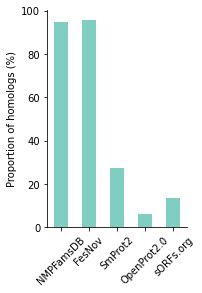

In [9]:
fig, ax = plt.subplots(figsize=(2.5,4))
x = df['Database']
y = df['Homolog fraction']
plt.bar(x,y,color='#80cdc1',width=0.5,label='Homolog')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.ylabel('Proportion of homologs (%)')